<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Recover_Binary_Search_Tree_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recover Binary Search Tree

You are given the root of a binary search tree (BST), where the values of exactly two nodes of the tree were swapped by mistake. Recover the tree without changing its structure.

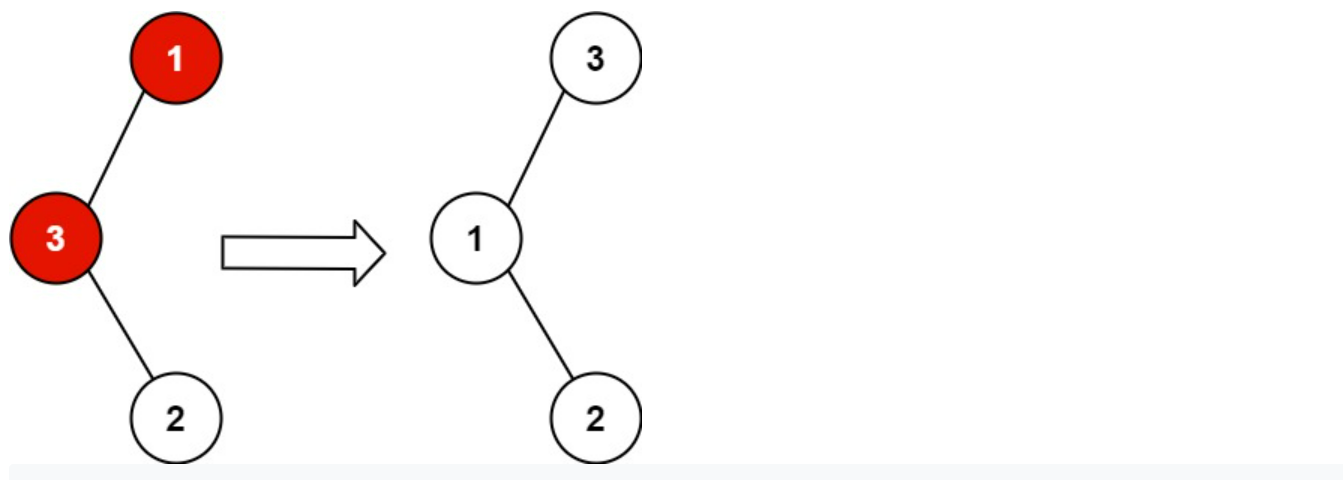

Example 1:

```
Input: root = [1,3,null,null,2]
Output: [3,1,null,null,2]
Explanation: 3 cannot be a left child of 1 because 3 > 1. Swapping 1 and 3 makes the BST valid.
```



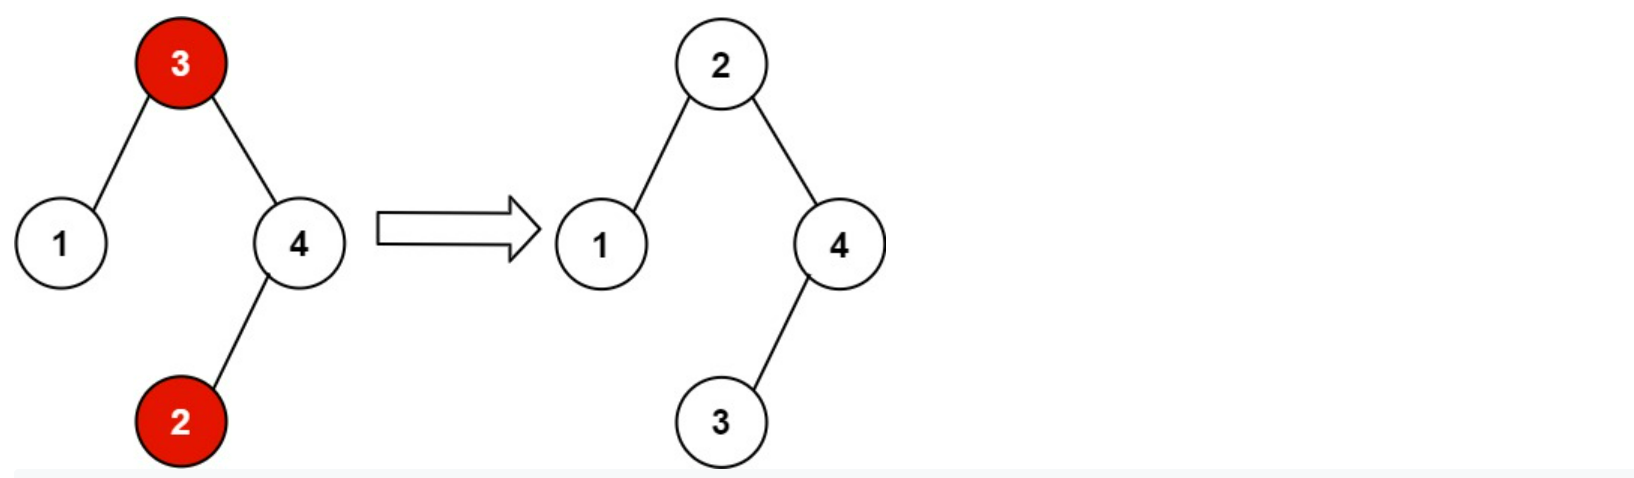

Example 2


```
Input: root = [3,1,4,null,null,2]
Output: [2,1,4,null,null,3]
Explanation: 2 cannot be in the right subtree of 3 because 2 < 3. Swapping 2 and 3 makes the BST valid.
```



# inorder and swap

In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # Time O(N)
    # Space O(N)
    def recoverTree(self, root):
        """
        Do not return anything, modify root in-place instead.
        """
        def inorder_traversal(node, array = []):
            if node == None:
                return
            inorder_traversal(node.left, array)
            array.append(node.val)
            inorder_traversal(node.right, array)
            
        def find_two_swapped(array):
            x, y = None, None
            for i in range(len(array) - 1):
                if array[i + 1] < array[i]:
                    y = array[i + 1]
                    if x is None:
                        x = array[i]
                    else:
                        break
            return x, y
        
        def swap(node, x, y, count = 2):
            if node == None:
                return
            if node.val == x:
                node.val = y
                count -= 1
            elif node.val == y:
                node.val = x
                count -= 1
            if count == 0:
                return
            swap(node.left, x, y, count)
            swap(node.right, x, y, count)
        
        array = []
        inorder_traversal(root, array)
        x, y = find_two_swapped(array)
        swap(root, x, y)

In [2]:
root = TreeNode(3)
root.left = TreeNode(1)
root.right = TreeNode(4)
root.right.left = TreeNode(2)

Solution().recoverTree(root)

print(root.val)
print(root.right.left.val)

2
3


# Solution 2: iterative and stack

In [3]:
class Solution:
    # Time O(N)
    # Space O(N)
    def recoverTree(self, root: TreeNode):
        """
        :rtype: void Do not return anything, modify root in-place instead.
        """
        stack = []
        x = y = pred = None
        
        while stack or root:
          while root:
            stack.append(root)
            root = root.left
          root = stack.pop()
          if pred and root.val < pred.val:
            y = root
            if x == None:
              x = pred
            else:
              break

          pred = root
          root = root.right

        x.val, y.val = y.val, x.val

In [4]:
root = TreeNode(3)
root.left = TreeNode(1)
root.right = TreeNode(4)
root.right.left = TreeNode(2)

Solution().recoverTree(root)

print(root.val)
print(root.right.left.val)

2
3


# Solution 3: Morris inorder traversal

In [5]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# Time = O(N)
# Space = O(1)
class Solution:
    def recoverTree(self, root: TreeNode):
        """
        :type root: TreeNode
        :rtype: void Do not return anything, modify root in-place instead.
        """
        x = y = morris_pred = pred = None

        while root:
            if root.left:
                morris_pred = root.left
                while morris_pred.right and morris_pred.right != root:
                    morris_pred = morris_pred.right
                
                # go left
                if morris_pred.right == None:
                    morris_pred.right = root
                    root = root.left
                    
                # cycle found
                else:
                    # append node for inorder traversal
                    if pred and root.val < pred.val:
                        y = root
                        if x == None:
                            x = pred
                    
                    # go right
                    pred = root
                    morris_pred.right = None
                    root = root.right
                    
            # no left sub tree
            else:
                # append node for inorder traversal
                if pred and root.val < pred.val:
                    y = root
                    if x == None:
                        x = pred
                    
                # go right
                pred = root
                root = root.right
                
        x.val, y.val = y.val, x.val
            
        

In [6]:
root = TreeNode(3)
root.left = TreeNode(1)
root.right = TreeNode(4)
root.right.left = TreeNode(2)

Solution().recoverTree(root)

print(root.val)
print(root.right.left.val)

2
3


## Conceptual Note

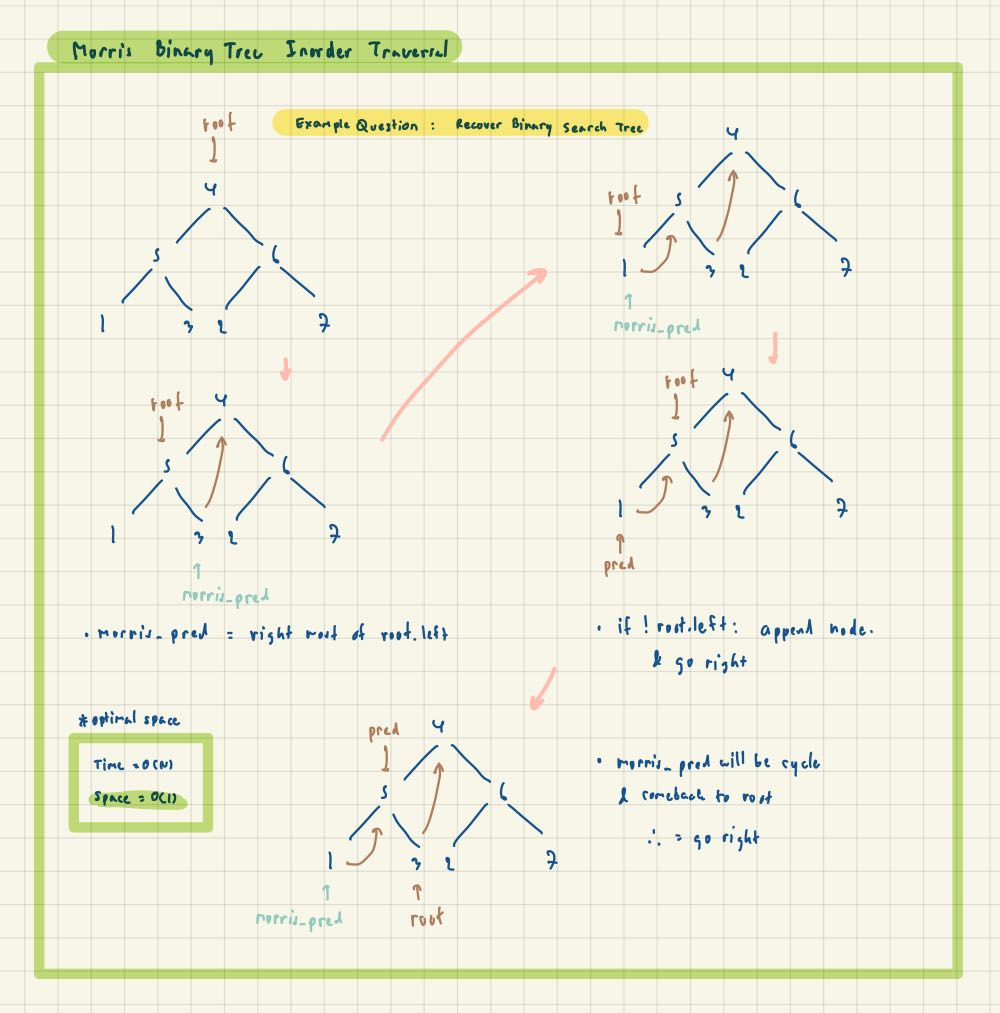